## Remove.BG API

In [10]:
ITEM = "5"
INPUT = "../zm_scraper/auctions/raw/"+ITEM
OUTPUT = "../zm_scraper/auctions/preprocessed/"+ITEM

In [ ]:
import os
import requests
import shutil
from dotenv import load_dotenv

# get api key from .env
load_dotenv()
REMOVEBG_API_KEY = os.getenv("REMOVEBG_API_KEY")

# Create output directory if it doesn't exist
os.makedirs(OUTPUT, exist_ok=True)

# Supported input formats
processable_exts = (".jpg", ".jpeg", ".png")

for filename in os.listdir(INPUT):
    if not filename.lower().endswith(processable_exts):
        continue

    input_path = os.path.join(INPUT, filename)
    base_name = os.path.splitext(filename)[0]
    output_filename = base_name + ".png"
    output_path = os.path.join(OUTPUT, output_filename)

    # Skip if output file already exists
    if os.path.exists(output_path):
        print(f"Skipping (already exists): {output_filename}")
        continue

    # If PNG, just copy it
    if filename.lower().endswith(".png"):
        shutil.copy2(input_path, output_path)
        print(f"Copied PNG: {filename}")
        continue

    # Process with Remove.bg API
    print(f"Processing with Remove.bg: {filename}")
    try:
        with open(input_path, 'rb') as img_file:
            response = requests.post(
                'https://api.remove.bg/v1.0/removebg',
                files={'image_file': img_file},
                data={'size': 'preview'},
                headers={'X-Api-Key': REMOVEBG_API_KEY},
            )

        if response.status_code == requests.codes.ok:
            with open(output_path, 'wb') as out:
                out.write(response.content)
            print(f"Saved (removed bg): {output_path}")
        else:
            print(f"Error on {filename}: {response.status_code}, {response.text}")

    except Exception as e:
        print(f"Exception on {filename}: {e}")
        
print("All Complete!")

Processing with Remove.bg: p1191731871.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/p1191731871.png
Processing with Remove.bg: p1190346016.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/p1190346016.png
Processing with Remove.bg: o1168947584.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/o1168947584.png
Processing with Remove.bg: l1178403345.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/l1178403345.png
Processing with Remove.bg: r1191200372.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/r1191200372.png
Processing with Remove.bg: e1178664397.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/e1178664397.png
Processing with Remove.bg: j1150682003.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/j1150682003.png
Processing with Remove.bg: f1191337222.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/f1191337222.png
Processing with Remove.bg: u1180931211.jpg
Saved (removed bg): ../zm_scr

Saved (removed bg): ../zm_scraper/listing/preprocessed/5/t1184982672.png
Processing with Remove.bg: g1183005819.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/g1183005819.png
Processing with Remove.bg: h1191165592.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/h1191165592.png
Processing with Remove.bg: u1191666133.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/u1191666133.png
Processing with Remove.bg: q1191048983.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/q1191048983.png
Processing with Remove.bg: 1173555456.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/1173555456.png
Processing with Remove.bg: s1188945072.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/s1188945072.png
Processing with Remove.bg: n1191341403.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/n1191341403.png
Processing with Remove.bg: c1147312897.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/c1147312897.png
P

Saved (removed bg): ../zm_scraper/listing/preprocessed/5/s1191490904.png
Processing with Remove.bg: f1174041028.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/f1174041028.png
Processing with Remove.bg: n1181024942.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/n1181024942.png
Processing with Remove.bg: u1127527151.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/u1127527151.png
Processing with Remove.bg: m1165305941.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/m1165305941.png
Processing with Remove.bg: k1191725213.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/k1191725213.png
Processing with Remove.bg: m1191719765.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/m1191719765.png
Processing with Remove.bg: l1191626006.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/l1191626006.png
Processing with Remove.bg: f1191141782.jpg
Saved (removed bg): ../zm_scraper/listing/preprocessed/5/f1191141782.png

## BG Remover with CV2 (Single)

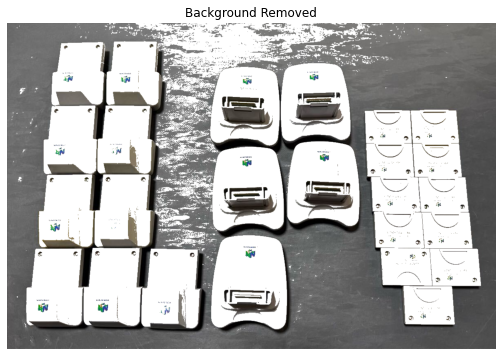

In [10]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def bgremove1(myimage):
    # Blur the image to reduce noise
    myimage = cv2.GaussianBlur(myimage, (5,5), 0)

    # Bin the pixels
    bins = np.array([0,51,102,153,204,255])
    myimage[:,:,:] = np.digitize(myimage[:,:,:], bins, right=True) * 51

    # Convert to greyscale for thresholding
    myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)

    # Otsu threshold to extract background
    _, background = cv2.threshold(myimage_grey, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)

    # Otsu threshold to extract foreground
    _, foreground_mask = cv2.threshold(myimage_grey, 0, 255, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU)
    foreground = cv2.bitwise_and(myimage, myimage, mask=foreground_mask)

    # Combine background and foreground
    finalimage = background + foreground

    return finalimage

def bgremove2(myimage):
    # First Convert to Grayscale
    myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)
 
    ret,baseline = cv2.threshold(myimage_grey,127,255,cv2.THRESH_TRUNC)
 
    ret,background = cv2.threshold(baseline,126,255,cv2.THRESH_BINARY)
 
    ret,foreground = cv2.threshold(baseline,126,255,cv2.THRESH_BINARY_INV)
 
    foreground = cv2.bitwise_and(myimage,myimage, mask=foreground)  # Update foreground with bitwise_and to extract real foreground
 
    # Convert black and white back into 3 channel greyscale
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
 
    # Combine the background and foreground to obtain our final image
    finalimage = background+foreground
    return finalimage

def bgremove3(myimage):
    # BG Remover 3
    myimage_hsv = cv2.cvtColor(myimage, cv2.COLOR_BGR2HSV)
     
    #Take S and remove any value that is less than half
    s = myimage_hsv[:,:,1]
    s = np.where(s < 127, 0, 1) # Any value below 127 will be excluded
 
    # We increase the brightness of the image and then mod by 255
    v = (myimage_hsv[:,:,2] + 127) % 255
    v = np.where(v > 127, 1, 0)  # Any value above 127 will be part of our mask
 
    # Combine our two masks based on S and V into a single "Foreground"
    foreground = np.where(s+v > 0, 1, 0).astype(np.uint8)  #Casting back into 8bit integer
 
    background = np.where(foreground==0,255,0).astype(np.uint8) # Invert foreground to get background in uint8
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)  # Convert background back into BGR space
    foreground=cv2.bitwise_and(myimage,myimage,mask=foreground) # Apply our foreground map to original image
    finalimage = background+foreground # Combine foreground and background
 
    return finalimage

# Corrected path construction
idx = "j1191033788"
image_path = os.path.join("yjpa_scraper/items_listing/raw/108/", idx + ".jpg")

# Load the image
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Could not read image at {image_path}")

# Run background removal
result = bgremove2(img)

# Convert BGR to RGB for display
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Show in Jupyter
plt.figure(figsize=(10,6))
plt.imshow(result_rgb)
plt.axis("off")
plt.title("Background Removed")
plt.show()


## BG Remover with CV2 (Multiple)

In [ ]:
import os
import numpy as np
import cv2
import pandas as pd


# Make sure POSTPROCESSING_DIR exists
os.makedirs(POSTPROCESSING_DIR, exist_ok=True)

# Read items CSV
df = pd.read_csv(TEXT_PROMPT_CSV, usecols=["id"])
ids = df["id"].astype(str).tolist()
print(f"Found {len(ids)} IDs to process.")

# Process each item
for item_id in ids:
    images_in_dir = os.path.join(PREPROCESSED, item_id)
    labels_in_dir = os.path.join(OUTPUT_LABELS_DIR, item_id)
    images_out_dir = os.path.join(POSTPROCESSING_DIR, item_id)
    labels_out_dir = os.path.join(POSTPROCESSING_LABELS_DIR, item_id)
    
    os.makedirs(images_out_dir, exist_ok=True)
    os.makedirs(labels_out_dir, exist_ok=True)

    if not os.path.exists(labels_in_dir):
        print(f"[{item_id}] Labels directory does not exist. Skipping.")
        continue

    # List mask files
    mask_files = sorted([
        f for f in os.listdir(labels_in_dir)
        if f.endswith("_masks.npy")
    ])

    if not mask_files:
        print(f"[{item_id}] No mask files found in {labels_in_dir}. Skipping.")
        continue

    for mask_file in mask_files:
        base_name = mask_file.replace("_masks.npy", "")
        mask_path = os.path.join(labels_in_dir, mask_file)

        # Load original image
        img_path_jpg = os.path.join(images_in_dir, base_name + ".jpg")
        if not os.path.exists(img_path_jpg):
            print(f"[{item_id}] {base_name}.jpg not found. Skipping.")
            continue

        img_bgr = cv2.imread(img_path_jpg)
        if img_bgr is None:
            print(f"[{item_id}] Could not read {img_path_jpg}. Skipping.")
            continue

        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        h, w = img_rgb.shape[:2]
        total_pixels = h * w

        # Load masks
        masks_array = np.load(mask_path, allow_pickle=True)

        # Filter masks: remove any that are too big
        filtered_masks = []
        for mask in masks_array:
            # FILTER: BG Filter based on size
            area = np.count_nonzero(mask)
            size = area / total_pixels
            if size >= 0.50:
                continue

            # FILTER: Check masked image for solid colour
            masked_pixels = img_rgb[mask]
            is_solid_color = np.all(masked_pixels)
            if is_solid_color and size >= 0.5:
                continue  

            filtered_masks.append(mask)
            
        if not filtered_masks:
            print(f"[{item_id}] {base_name}: No valid masks after filtering (size + color). Skipping.")
            continue
            
        # Create composite mask
        composite_mask = np.zeros((h, w), dtype=np.uint8)
        for mask in filtered_masks:
            composite_mask[mask] = 255

        # Apply mask (black background)
        masked_img = img_rgb.copy()
        masked_img[composite_mask == 0] = 0

        # Save masked image
        output_img_path = os.path.join(images_out_dir, base_name + ".jpg")
        cv2.imwrite(output_img_path, cv2.cvtColor(masked_img, cv2.COLOR_RGB2BGR))

        # Save updated masks
        updated_mask_path = os.path.join(labels_out_dir, base_name + "_masks.npy")
        np.save(updated_mask_path, filtered_masks)

        # Overlay visualization
#         overlay_img = img_rgb.copy()
#         for mask in filtered_masks:
#             color = np.random.randint(0, 255, (3,), dtype=np.uint8)
#             overlay_img[mask] = overlay_img[mask] * 0.4 + color * 0.6
#         overlay_path = os.path.join(images_out_dir, base_name + "_overlay.jpg")
#         cv2.imwrite(overlay_path, cv2.cvtColor(overlay_img, cv2.COLOR_RGB2BGR))

        print(f"[{item_id}] {base_name}: Saved foreground image and {len(filtered_masks)} masks.")
        
print("All completed!")